GRUPO 6 - Alumnas: Vanina Candelaria Sulca, Ruth Carinao


ANALISIS DE GENERACION Y DEMANDA DE ENERGIA RENOVABLE EN ARGENTINA

**OBJETIVO GENERAL**

Analizar la generación y demanda de energía renovable en Argentina a lo largo del tiempo, identificando patrones temporales, distribución por tipo de fuente y localización geográfica, con el fin de evaluar el desempeño del sistema energético y su alineación con los objetivos de sostenibilidad.

### 📄 Descripción de las variables del Dataset

| Variable               | Descripción                                                                 |
|------------------------|------------------------------------------------------------------------------|
| `anio`                 | Año en el que se registró la generación o demanda de energía.               |
| `mes` / `fecha`        | Mes o fecha específica de registro de generación/demanda.                   |
| `central`              | Código o nombre abreviado de la central generadora.                         |
| `central_descripcion`  | Nombre completo o descripción de la central.                                |
| `maquina`              | Identificador específico de la máquina o unidad generadora.                 |
| `fuente_energia`       | Tipo de fuente de energía utilizada (eólica, solar, hidráulica, etc.).       |
| `region`               | Región geográfica del país a la que pertenece la central.                   |
| `provincia`            | Provincia argentina donde se encuentra ubicada la central.                  |
| `energia_generada_gwh` | Cantidad de energía generada (o demandada) en Gigavatios hora (GWh).        |
| `tipo_generacion`      | Clasificación de la entrada como "Generación" o "Demanda" de energía.       |


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.preprocessing import MinMaxScaler


In [ ]:
# Montar Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Identificar ruta del archivo
ruta_archivo = '/content/drive/MyDrive/Dataset INGENIAS/Energía Renovables - Base de Datos 2025-03.xlsx'

In [ ]:
# Leer el archivo
df=pd.read_excel(ruta_archivo, skiprows=[0])


In [ ]:
# Informacion general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18669 entries, 0 to 18668
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   AÑO                     18669 non-null  int64         
 1   CENTRAL                 18669 non-null  object        
 2   CENTRAL DESCRIPCIÓN     18669 non-null  object        
 3   MAQUINA                 18669 non-null  object        
 4   FUENTE DE ENERGÍA       18669 non-null  object        
 5   REGIÓN                  18669 non-null  object        
 6   PROVINCIA               18669 non-null  object        
 7   MES                     18669 non-null  datetime64[ns]
 8   ENERGÍA GENERADA [GWh]  18669 non-null  float64       
 9   Nueva Generación        18669 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 1.4+ MB


In [ ]:
# Resumen estadistico de las variables numericas
df.describe()

,AÑO,MES,ENERGÍA GENERADA [GWh]
count,18669.000000,18669,18669.000000
mean,2019.920671,2020-05-16 15:11:52.132411904,106.916509
min,2011.000000,2011-01-01 00:00:00,0.000000
25%,2018.000000,2018-02-01 00:00:00,0.465783
50%,2021.000000,2021-06-01 00:00:00,2.372473
75%,2023.000000,2023-06-01 00:00:00,8.435337
max,2025.000000,2025-03-01 00:00:00,13996.904605
std,3.830954,NaN,1045.101701


In [ ]:
# Conteo de valores faltantes por columna
df.isnull().sum()

,0
AÑO,0
CENTRAL,0
CENTRAL DESCRIPCIÓN,0
MAQUINA,0
FUENTE DE ENERGÍA,0
REGIÓN,0
PROVINCIA,0
MES,0
ENERGÍA GENERADA [GWh],0
Nueva Generación,0


In [ ]:
# Renombrar columnas
df = df.rename(columns={
    'AÑO': 'anio',
    'CENTRAL': 'central',
    'CENTRAL DESCRIPCIÓN': 'central_descripcion',
    'MAQUINA': 'maquina',
    'FUENTE DE ENERGÍA': 'fuente_energia',
    'REGIÓN': 'region',
    'PROVINCIA': 'provincia',
    'MES': 'fecha',
    'ENERGÍA GENERADA [GWh]': 'energia_generada_gwh',
    'Nueva Generación': 'tipo_generacion'
})

df.head()

,anio,central,central_descripcion,maquina,fuente_energia,region,provincia,fecha,energia_generada_gwh,tipo_generacion
0,2011,AESP,AES PARANA,AESPCC01,BIODIESEL,BUENOS AIRES,BUENOS AIRES,2011-01-01,0.000000,Resto
1,2011,AESP,AES PARANA,AESPCC02,BIODIESEL,BUENOS AIRES,BUENOS AIRES,2011-01-01,0.000000,Resto
2,2011,AMEGHI,F. AMEGHINO,AMEGHI,HIDRO <=50MW,PATAGONIA,CHUBUT,2011-01-01,13.751828,Resto
3,2011,ARAUEO,ARAUCO EOLICO,ARAUEO,EOLICO,NOROESTE,LA RIOJA,2011-01-01,0.073369,Resto
4,2011,CADIHI,CADILLAL,CADIHI,HIDRO <=50MW,NOROESTE,TUCUMAN,2011-01-01,0.589851,Resto


In [ ]:
# Convertir fecha
df['fecha'] = pd.to_datetime(df['fecha'])
df['mes'] = df['fecha'].dt.month
df['anio'] = df['fecha'].dt.year

In [ ]:
# Procesamiento y Normalizacion
# Seleccionar variables numéricas para normalización
numeric_cols = ['energia_generada_gwh', 'mes', 'anio']
numeric_data = df[numeric_cols]

# Normalización Min-Max (escala 0-1)
minmax_scaler = MinMaxScaler()
df[numeric_cols] = minmax_scaler.fit_transform(numeric_data)

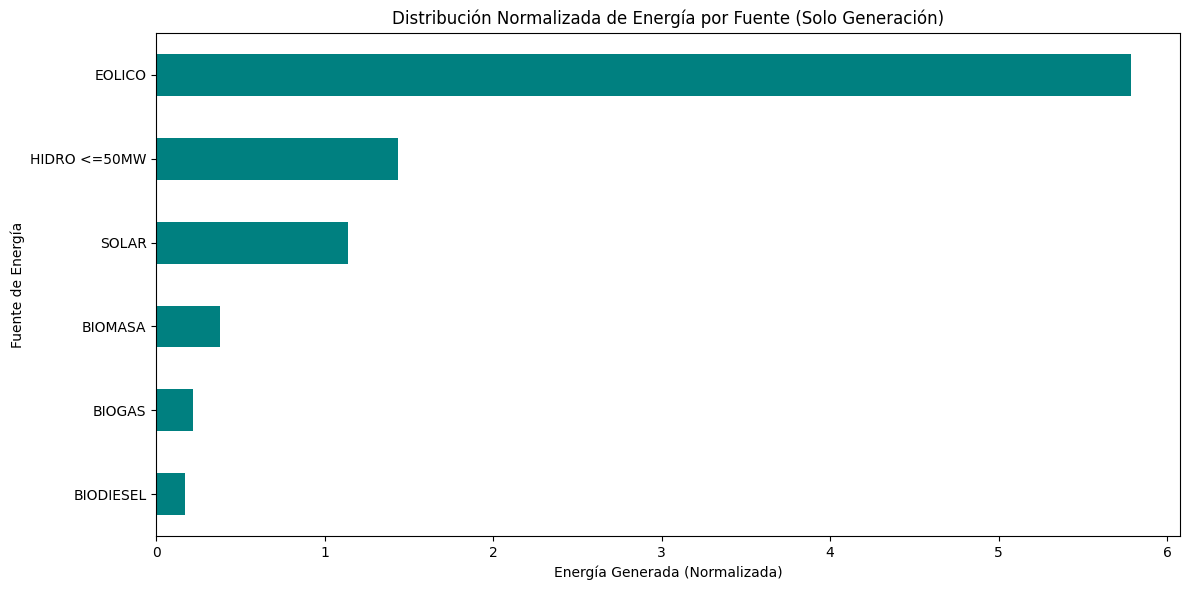

In [26]:
# 1. Distribución de energía por fuente
# Filtrar los datos para excluir la 'Demanda'
df_generacion = df[df['tipo_generacion'] != 'Demanda']
plt.figure(figsize=(12, 6))
df_generacion.groupby('fuente_energia')['energia_generada_gwh'].sum().sort_values().plot(
    kind='barh', color='teal')
plt.title('Distribución Normalizada de Energía por Fuente (Solo Generación)')
plt.xlabel('Energía Generada (Normalizada)')
plt.ylabel('Fuente de Energía')
plt.tight_layout()
plt.show()


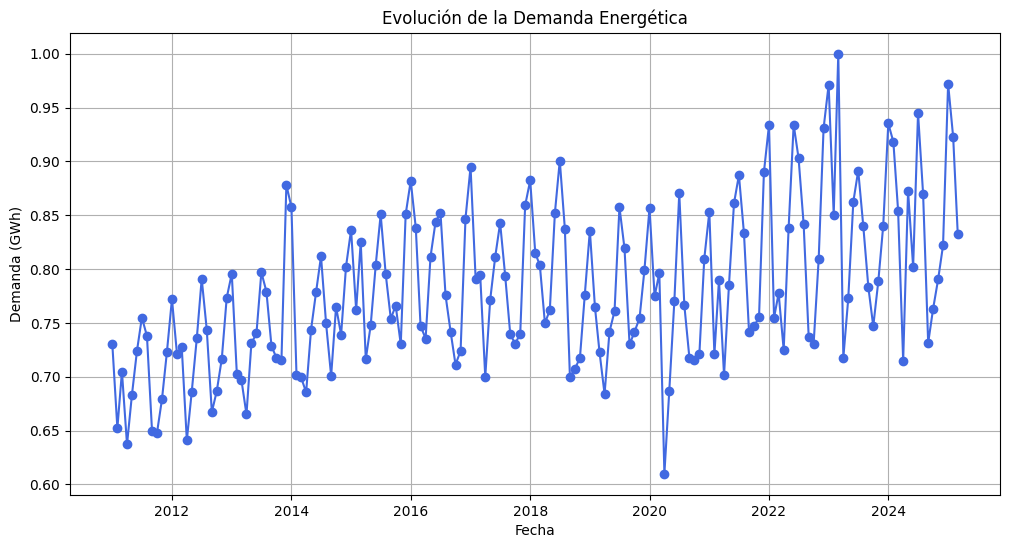

In [ ]:
# 2. Tendencia temporal de demanda
demanda = df[df['tipo_generacion'] == 'Demanda']
plt.figure(figsize=(12, 6))
plt.plot(demanda['fecha'], demanda['energia_generada_gwh'],
         marker='o', linestyle='-', color='royalblue')
plt.title('Evolución de la Demanda Energética')
plt.xlabel('Fecha')
plt.ylabel('Demanda (GWh)')
plt.grid(True)
plt.show()

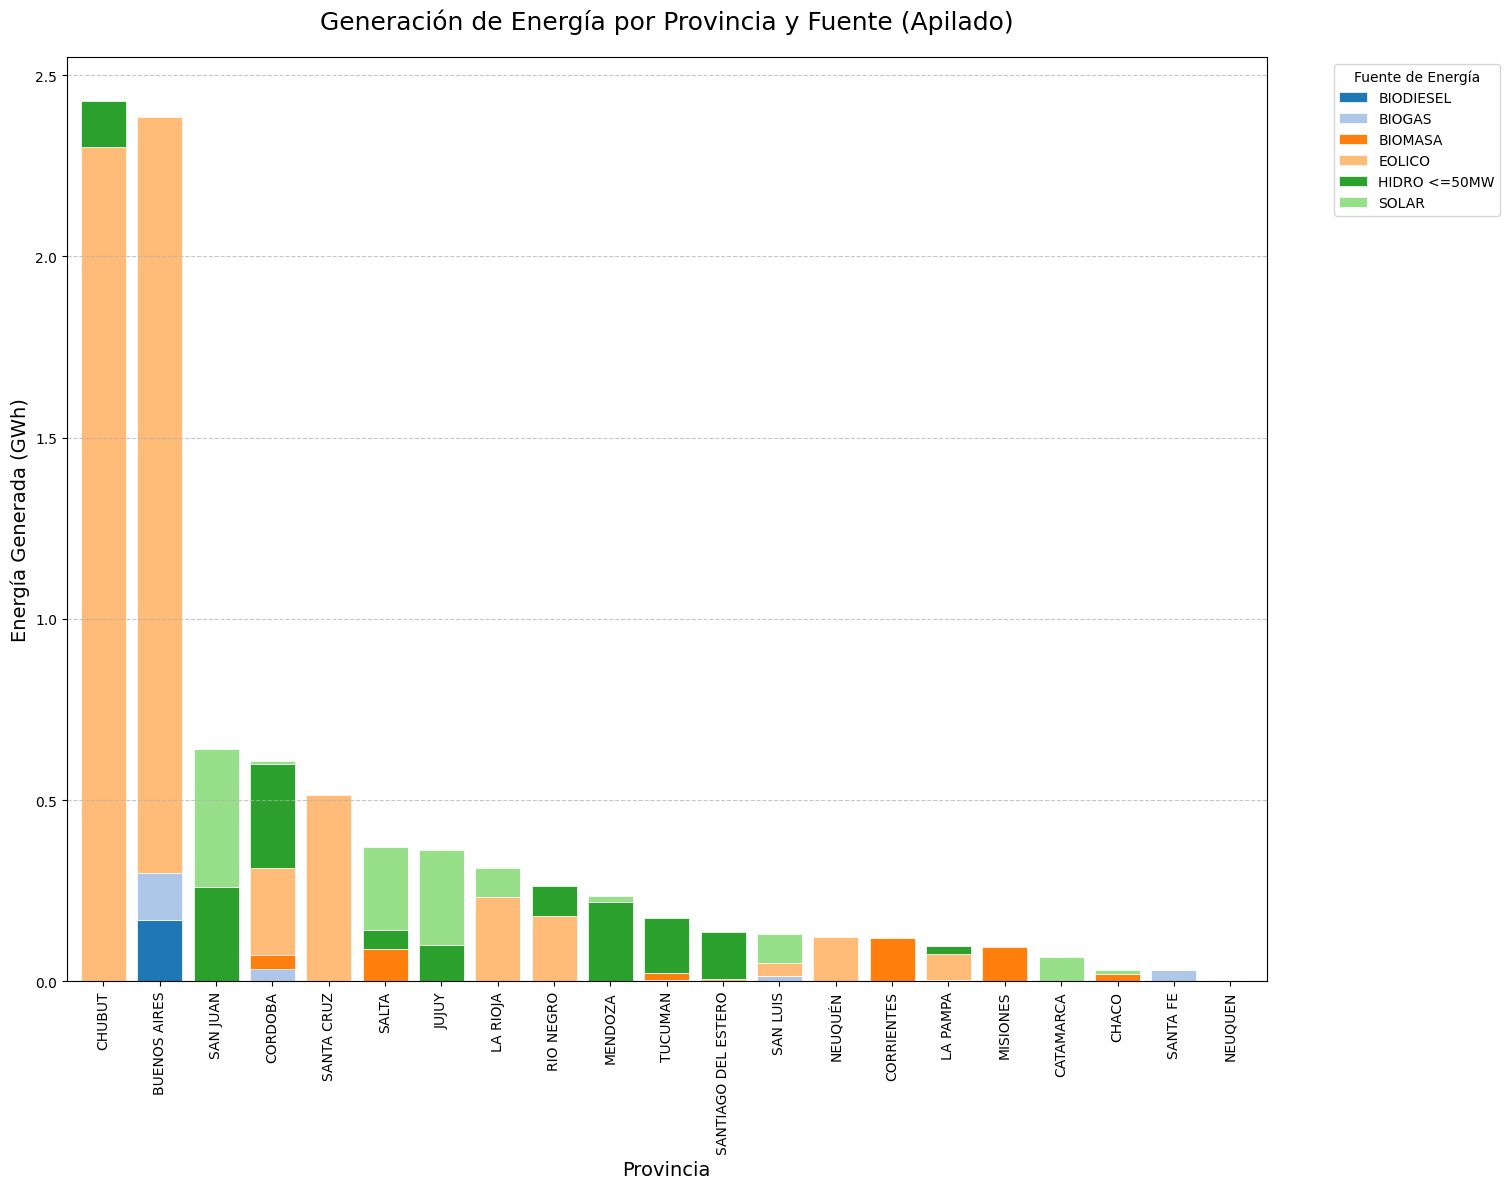

In [ ]:
# 3. Generación por provincia y fuente
# Filtrar solo generación (excluir demanda) y agrupar
generacion_provincia_fuente = df[df['tipo_generacion'] != 'Demanda'].groupby(
    ['provincia', 'fuente_energia']
)['energia_generada_gwh'].sum().reset_index()

# Convertir a formato wide para el gráfico apilado
generacion_pivot = generacion_provincia_fuente.pivot(
    index='provincia',
    columns='fuente_energia',
    values='energia_generada_gwh'
).fillna(0)  # Rellenar NaN con 0

# Ordenar las provincias por generación total
generacion_pivot['Total'] = generacion_pivot.sum(axis=1)
generacion_pivot = generacion_pivot.sort_values('Total', ascending=False).drop('Total', axis=1)

# Crear el gráfico de barras apiladas
plt.figure(figsize=(18, 12)) # Aumentar tamaño del gráfico para mejor visibilidad de etiquetas

# Seleccionar una paleta de colores adecuada
colores = sns.color_palette('tab20', n_colors=len(generacion_pivot.columns)) # Usar 'tab20' que tiene más colores distintos

# Graficar
ax = generacion_pivot.plot(
    kind='bar',
    stacked=True,
    color=colores,
    width=0.8,  # Ancho de las barras
    edgecolor='white',  # Borde blanco para separar segmentos
    linewidth=0.5,
    ax=plt.gca() # Usar el eje actual para mayor control
)

# Personalizar el gráfico
plt.title('Generación de Energía por Provincia y Fuente (Apilado)', fontsize=18, pad=20)
plt.xlabel('Provincia', fontsize=14)
plt.ylabel('Energía Generada (GWh)', fontsize=14)
plt.xticks(rotation=90, ha='center', fontsize=10)  # Rotar 90 grados y centrar etiquetas para evitar solapamiento
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añadir líneas de grid en el eje Y

# Mover la leyenda fuera del área del gráfico y ajustar su posición
plt.legend(
    title='Fuente de Energía',
    bbox_to_anchor=(1.05, 1), # Posicionar la leyenda a la derecha
    loc='upper left',
    fontsize=10,
    frameon=True, # Mostrar el marco de la leyenda
    facecolor='white' # Fondo blanco para la leyenda
)

# Ajustar márgenes para hacer espacio para la leyenda y etiquetas rotadas
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Ajustar el área del gráfico para dejar espacio a la derecha

# Mostrar el gráfico
plt.show()

<ipython-input-15-3764eb3d5a9e>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(key='fecha', freq='M'))['energia_generada_gwh'].sum()
<ipython-input-15-3764eb3d5a9e>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  demanda_mensual = demanda.groupby(pd.Grouper(key='fecha', freq='M'))['energia_generada_gwh'].sum()


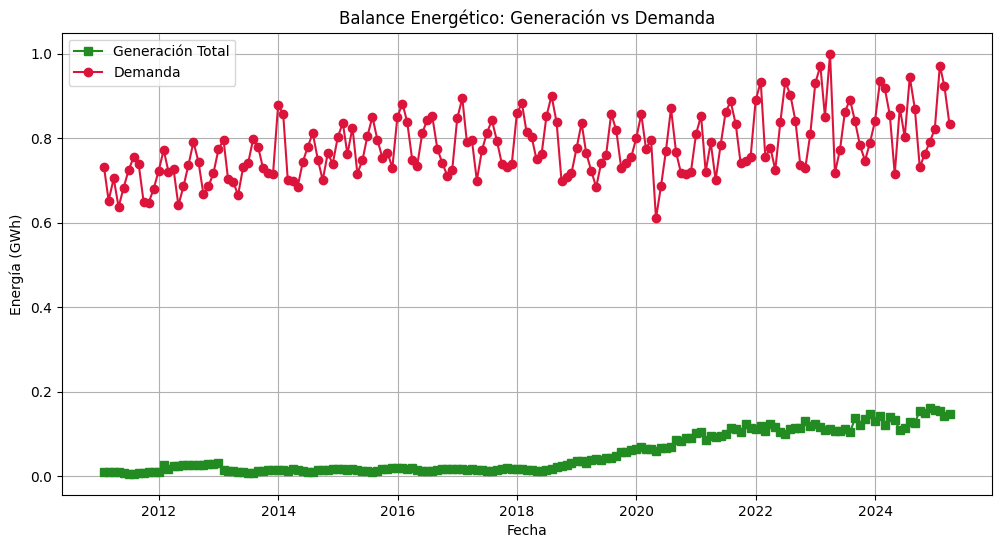

In [ ]:
# 4. Comparación generación vs demanda
generacion_mensual = df[df['tipo_generacion'] != 'Demanda'].groupby(
    pd.Grouper(key='fecha', freq='M'))['energia_generada_gwh'].sum()
demanda_mensual = demanda.groupby(pd.Grouper(key='fecha', freq='M'))['energia_generada_gwh'].sum()

plt.figure(figsize=(12, 6))
plt.plot(generacion_mensual.index, generacion_mensual,
         label='Generación Total', marker='s', color='forestgreen')
plt.plot(demanda_mensual.index, demanda_mensual,
         label='Demanda', marker='o', color='crimson')
plt.title('Balance Energético: Generación vs Demanda')
plt.xlabel('Fecha')
plt.ylabel('Energía (GWh)')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-27-9858c2d07417>:50: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(mapa_merged.geometry.centroid.x, mapa_merged.geometry.centroid.y, mapa_merged['nombre']):


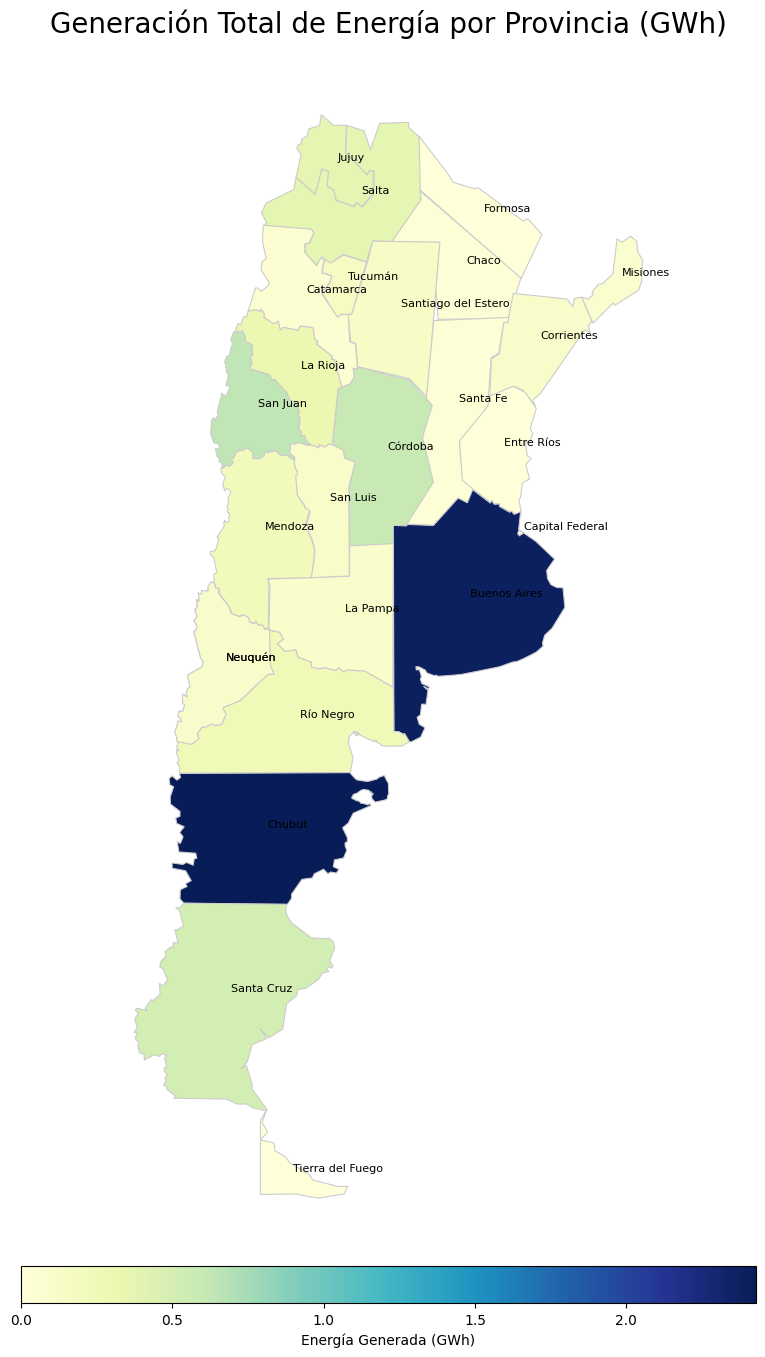

In [27]:
# 5. Mapa de Generación Total de Energia por Provincia
import geopandas as gpd
# Cargar mapa de provincias de Argentina

mapa = gpd.read_file("/content/drive/MyDrive/Dataset INGENIAS/ProvinciasArgentina.geojson")

# Calcular la generación total por provincia
gen_por_prov = df[df['tipo_generacion'] != 'Demanda'].groupby('provincia')['energia_generada_gwh'].sum().reset_index()

mapa['nombre_upper'] = mapa['nombre'].str.upper().str.replace('Á', 'A').str.replace('É', 'E').str.replace('Í', 'I').str.replace('Ó', 'O').str.replace('Ú', 'U')
gen_por_prov['provincia_upper'] = gen_por_prov['provincia'].str.upper().str.replace('Á', 'A').str.replace('É', 'E').str.replace('Í', 'I').str.replace('Ó', 'O').str.replace('Ú', 'U')

# Merge del mapa con los datos usando la columna unificada
mapa_merged = mapa.merge(gen_por_prov, how='left', left_on='nombre_upper', right_on='provincia_upper')

# Rellenar las provincias sin datos con 0 para que se muestren en el mapa
mapa_merged['energia_generada_gwh'] = mapa_merged['energia_generada_gwh'].fillna(0)

# Graficar
fig, ax = plt.subplots(1, 1, figsize=(15, 15)) # Aumentar el tamaño del mapa para mejor visualización

cmap_elegido = 'YlGnBu'

# Plotear el mapa con las provincias coloreadas por la generación de energía
mapa_merged.plot(
    column='energia_generada_gwh',
    cmap=cmap_elegido,
    linewidth=0.8,
    edgecolor='0.8', # Color del borde de las provincias
    legend=True, # Mostrar la barra de color
    ax=ax,
    # Barra de color
    legend_kwds={
        'label': "Energía Generada (GWh)",
        'orientation': "horizontal", # Orientación horizontal de la barra
        'pad': 0.01, # Espacio entre el mapa y la barra de color
        'shrink': 0.5 # Reducir el tamaño de la barra de color
    }
)

# Añadir títulos y ajustar visualmente
ax.set_title(
    'Generación Total de Energía por Provincia (GWh)',
    fontsize=20,
    pad=20 # Espacio entre el título y el mapa
)
ax.set_axis_off() # Ocultar los ejes (coordenadas)

# Añadir etiquetas de provincia
for x, y, label in zip(mapa_merged.geometry.centroid.x, mapa_merged.geometry.centroid.y, mapa_merged['nombre']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8)

# Asegurar que el mapa ocupa todo el espacio disponible en la figura
plt.tight_layout()

# Mostrar el mapa
plt.show()

Este análisis explora los datos de generación de energía renovable, ofreciendo las siguientes conclusiones:

1. **Distribución de Energía por Fuente:** Se muestra la cantidad total de energía generada por cada fuente renovable. Esto permite identificar las fuentes dominantes y comprender la diversificación de la matriz energética.

2. **Tendencia de la Demanda Energética:** Se visualiza la evolución de la demanda de energía a lo largo del tiempo.  Esta información es crucial para planificar la generación y asegurar el suministro.  Se observa la tendencia (creciente, decreciente, o estable) de la demanda.

3. **Generación por Provincia y Fuente:** Se analiza la generación de energía por provincia y por fuente, lo que ayuda a identificar las regiones con mayor potencial para cada tipo de energía renovable y a comprender las particularidades geográficas de la generación.

4. **Balance Energético (Generación vs. Demanda):**  Se compara la generación total de energía con la demanda. Este gráfico es fundamental para evaluar si la generación cubre la demanda o si existe un déficit.  Muestra si la generación está alineada con las necesidades del consumo, o si hay periodos de excedente o escasez de energía.

5. **Mapa de Generación Total de Energia por Provincia:**
El mapa de generación total de energía por provincia permite visualizar espacialmente la distribución de la generación energética en Argentina. Las provincias con colores más intensos son aquellas que tienen una mayor producción de energía. Esta representación geográfica es fundamental para:
- Identificar las principales zonas de producción energética del país.
- Comprender la contribución relativa de cada provincia a la matriz energética nacional.
- Planificar la expansión de infraestructuras de generación y transmisión de energía, priorizando las áreas de alta producción o con potencial de crecimiento.
- Analizar las disparidades regionales en la generación de energía y desarrollar políticas específicas para fomentar la generación en áreas con menor desarrollo.